In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import interpolate


sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.2)

In [2]:
from collections import defaultdict

def add_widths(x, y, width=0.1):
    """ Adds flat parts to widths """
    new_x = []
    new_y = []
    for i,j in zip(x,y):
        new_x += [i-width, i, i+width]
        new_y += [j, j, j]
    return new_x, new_y

def bumpsplot(dataframe, color_dict=defaultdict(lambda: "k"), 
                         linewidth_dict=defaultdict(lambda: 1),
                         labels=[]):
    r = dataframe.rank(method="first")
    maxRank=r.max().max()+1
    r = (r).fillna(maxRank) # Sets NAs to 0 in rank

    for i in r.index:
        x = np.arange(r.shape[1])
        y = maxRank - r.loc[i].values
        color = color_dict[i]
        lw = linewidth_dict[i]
        x, y = add_widths(x, y, width=0.1)
        xs = np.linspace(0, x[-1], num=1024)
        plt.plot(xs, interpolate.PchipInterpolator(x, y)(xs), color=color, linewidth=lw, alpha=0.5)
        if i in labels:
            if y[0] != 0:
                plt.text(x[0] - 0.1, y[0], s=i, horizontalalignment="right", verticalalignment="center", color=color, fontsize=20)
            if y[-1] != 0:
                plt.text(x[-1] + 0.1, y[-1], s=i, horizontalalignment="left", verticalalignment="center", color=color, fontsize=20)
    plt.xticks(np.arange(r.shape[1]), dataframe.columns)

## After base year EET

In [9]:
eet = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/eet_aby.csv',index_col="inputs")
eet_mu = eet[['Primary Spot Wholesale prices-M','Tariffs-M','Renewable energy-M','GHGE-M', ]]
eet_mu_prices = eet[['Primary Spot Wholesale prices-M','Tariffs-M' ]]
eet_mu_other = eet[['Renewable energy-M','GHGE-M']]

eet_sigma = eet[['Tariffs-S','Primary Spot Wholesale prices-S', 'Renewable energy-S', 'GHGE-S']]


Select labels and colors for the first column of inputs

In [10]:
input_colors_mu = defaultdict(lambda: "grey")
lw_mu = defaultdict(lambda: 1)

input_colors_mu_prices = defaultdict(lambda: "grey")
lw_mu_prices = defaultdict(lambda: 1)

input_colors_mu_other = defaultdict(lambda: "grey")
lw_mu_other = defaultdict(lambda: 1)

input_colors_sigma = defaultdict(lambda: "grey")
lw_sigma = defaultdict(lambda: 1)

top_inputs_mu = eet_mu.iloc[:, 0].dropna().sort_values().index
top_inputs_mu = top_inputs_mu.append(eet_mu.iloc[:, -1].dropna().sort_values().index).drop_duplicates()

top_inputs_mu_prices = eet_mu_prices.iloc[:, 0].dropna().sort_values().index
top_inputs_mu_prices = top_inputs_mu_prices.append(eet_mu_prices.iloc[:, -1].dropna().sort_values().index).drop_duplicates()

top_inputs_mu_other = eet_mu_other.iloc[:, 0].dropna().sort_values().index
top_inputs_mu_other = top_inputs_mu_other.append(eet_mu_other.iloc[:, -1].dropna().sort_values().index).drop_duplicates()

top_inputs_sigma = eet_sigma.iloc[:, 0].dropna().sort_values().index
top_inputs_sigma = top_inputs_sigma.append(eet_sigma.iloc[:, -1].dropna().sort_values().index).drop_duplicates()


for i,c in enumerate(top_inputs_mu_prices):
    input_colors_mu_prices[c] = sns.color_palette("Dark2", n_colors=len(top_inputs_mu_prices))[i]
    lw_mu_prices[c] = 4

for i,c in enumerate(top_inputs_mu_other):
    input_colors_mu_other[c] = sns.color_palette("Dark2", n_colors=len(top_inputs_mu_other))[i]
    lw_mu_other[c] = 4
    
for i,c in enumerate(top_inputs_mu):
    input_colors_mu[c] = sns.color_palette("Dark2", n_colors=len(top_inputs_mu))[i]
    lw_mu[c] = 4
    
for i,c in enumerate(top_inputs_sigma):
    input_colors_sigma[c] = sns.color_palette("Dark2", n_colors=len(top_inputs_sigma))[i]
    lw_sigma[c] = 4


Plot Bump Charts. It is useful to visualize how important are the inputs of the first outcome/column with respect to other columns. If color lines  appear at the bottom of the chart it means that they are not relevant

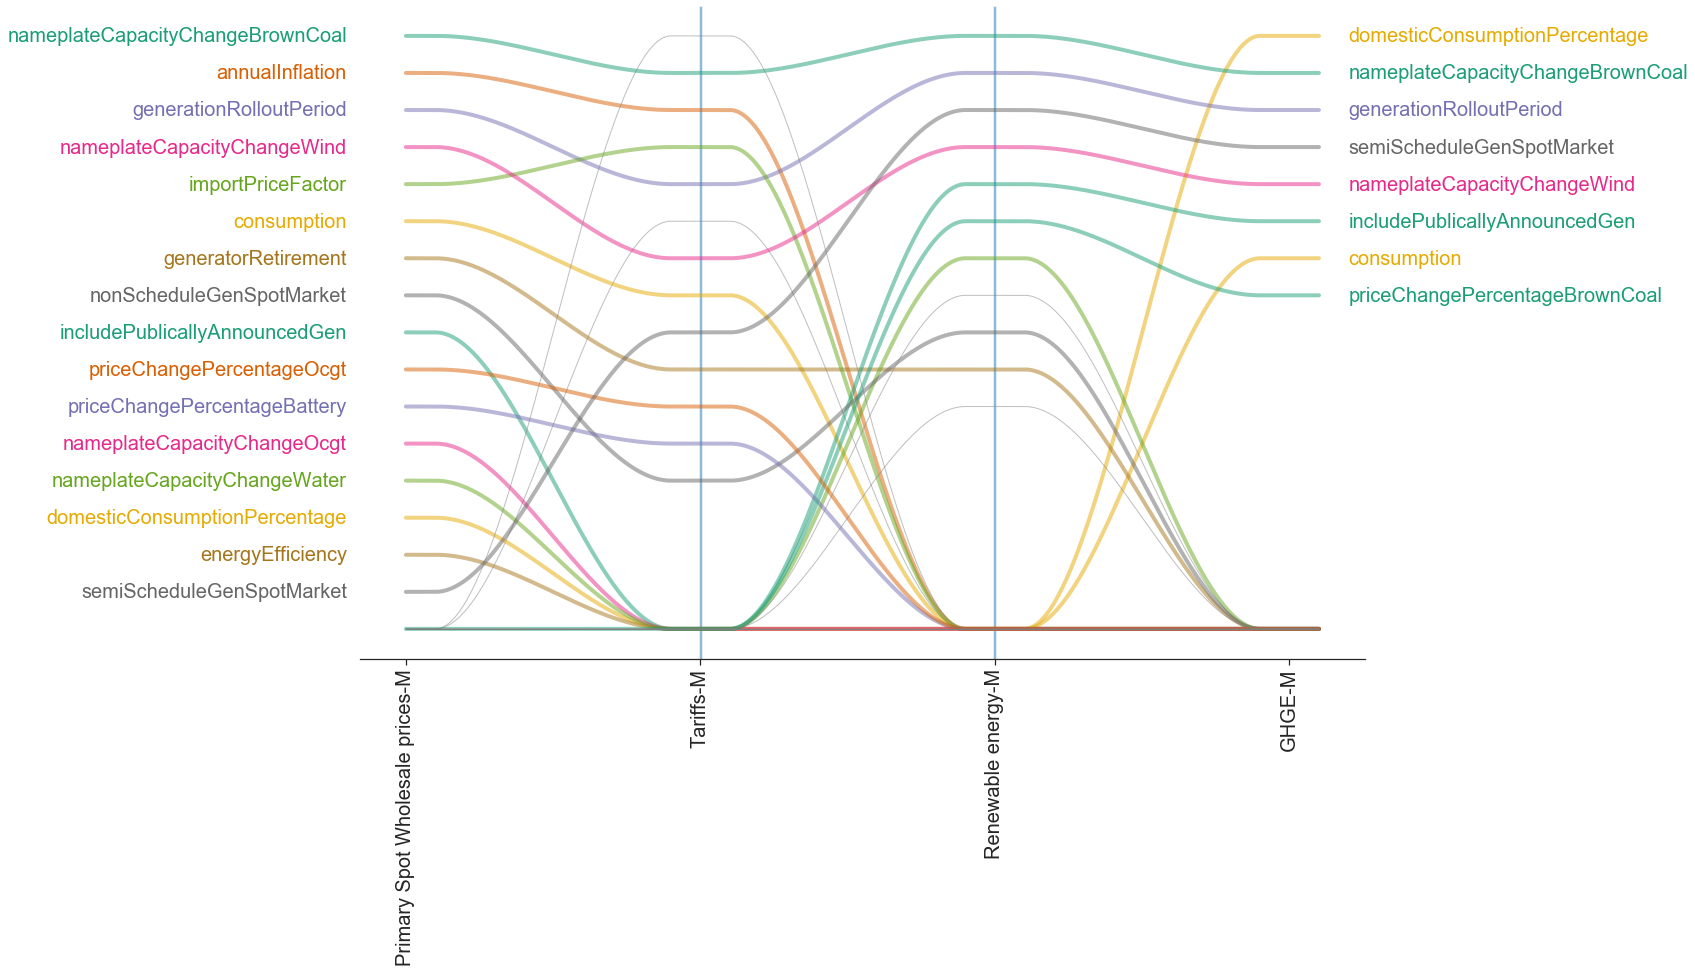

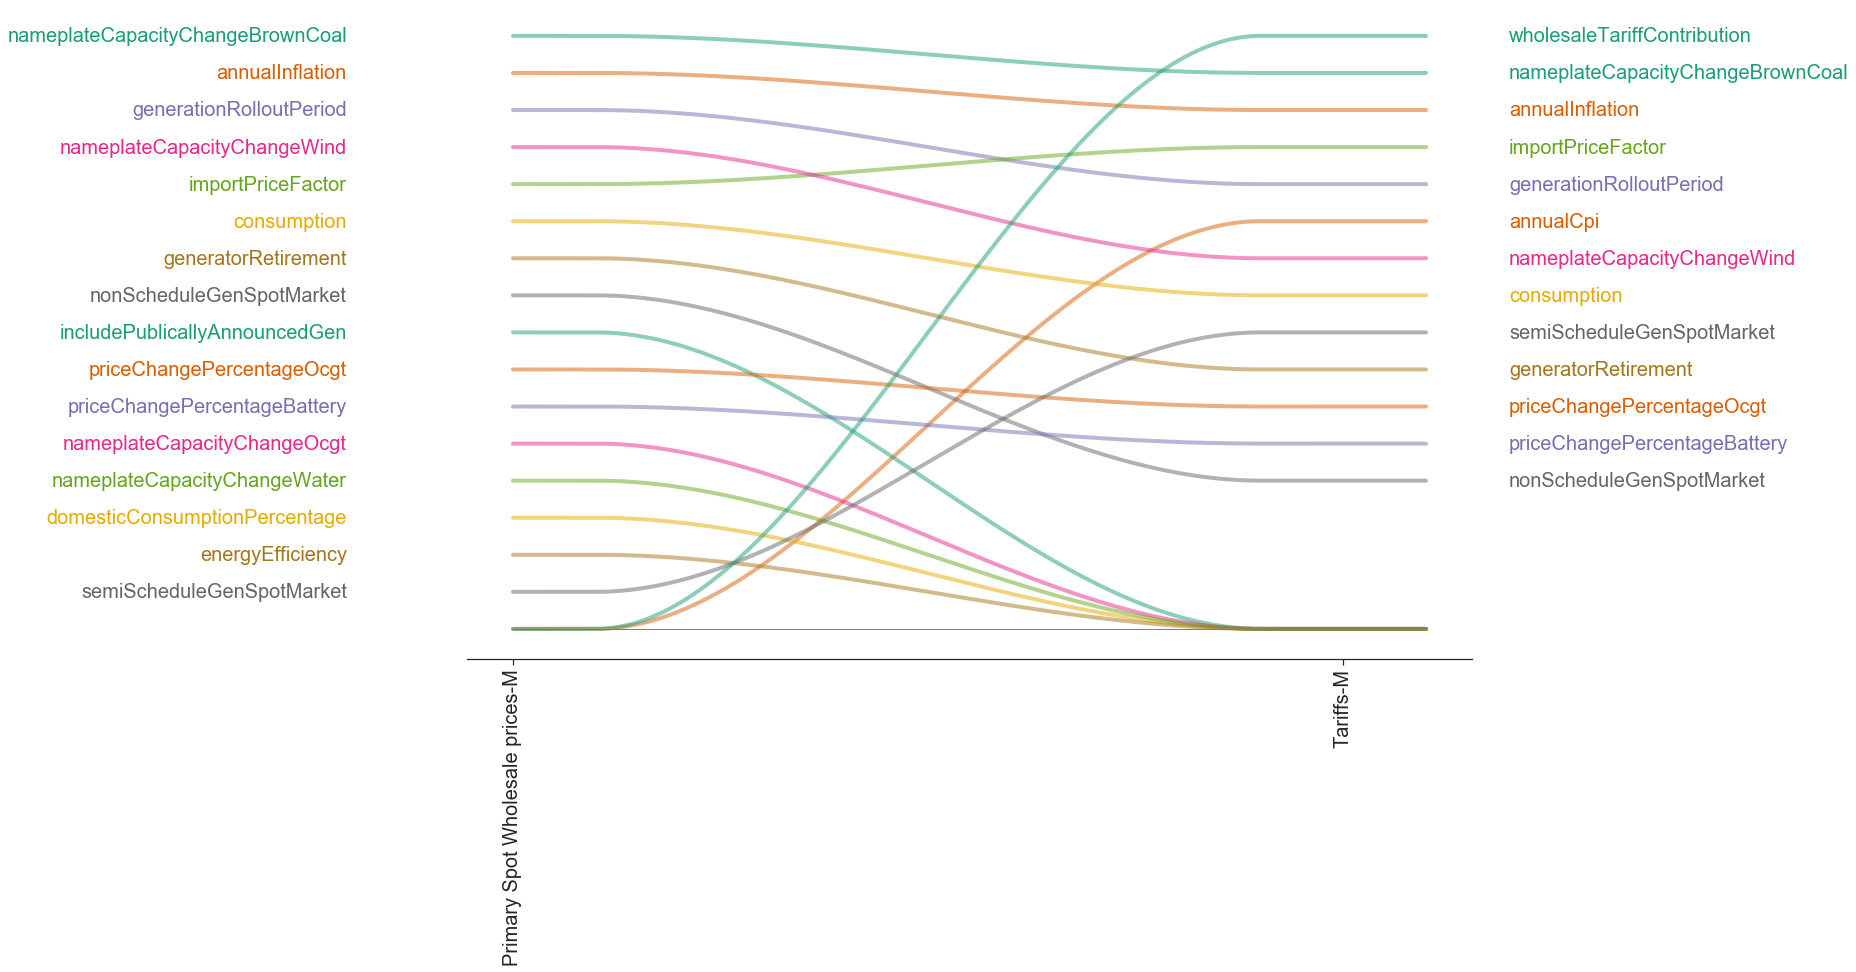

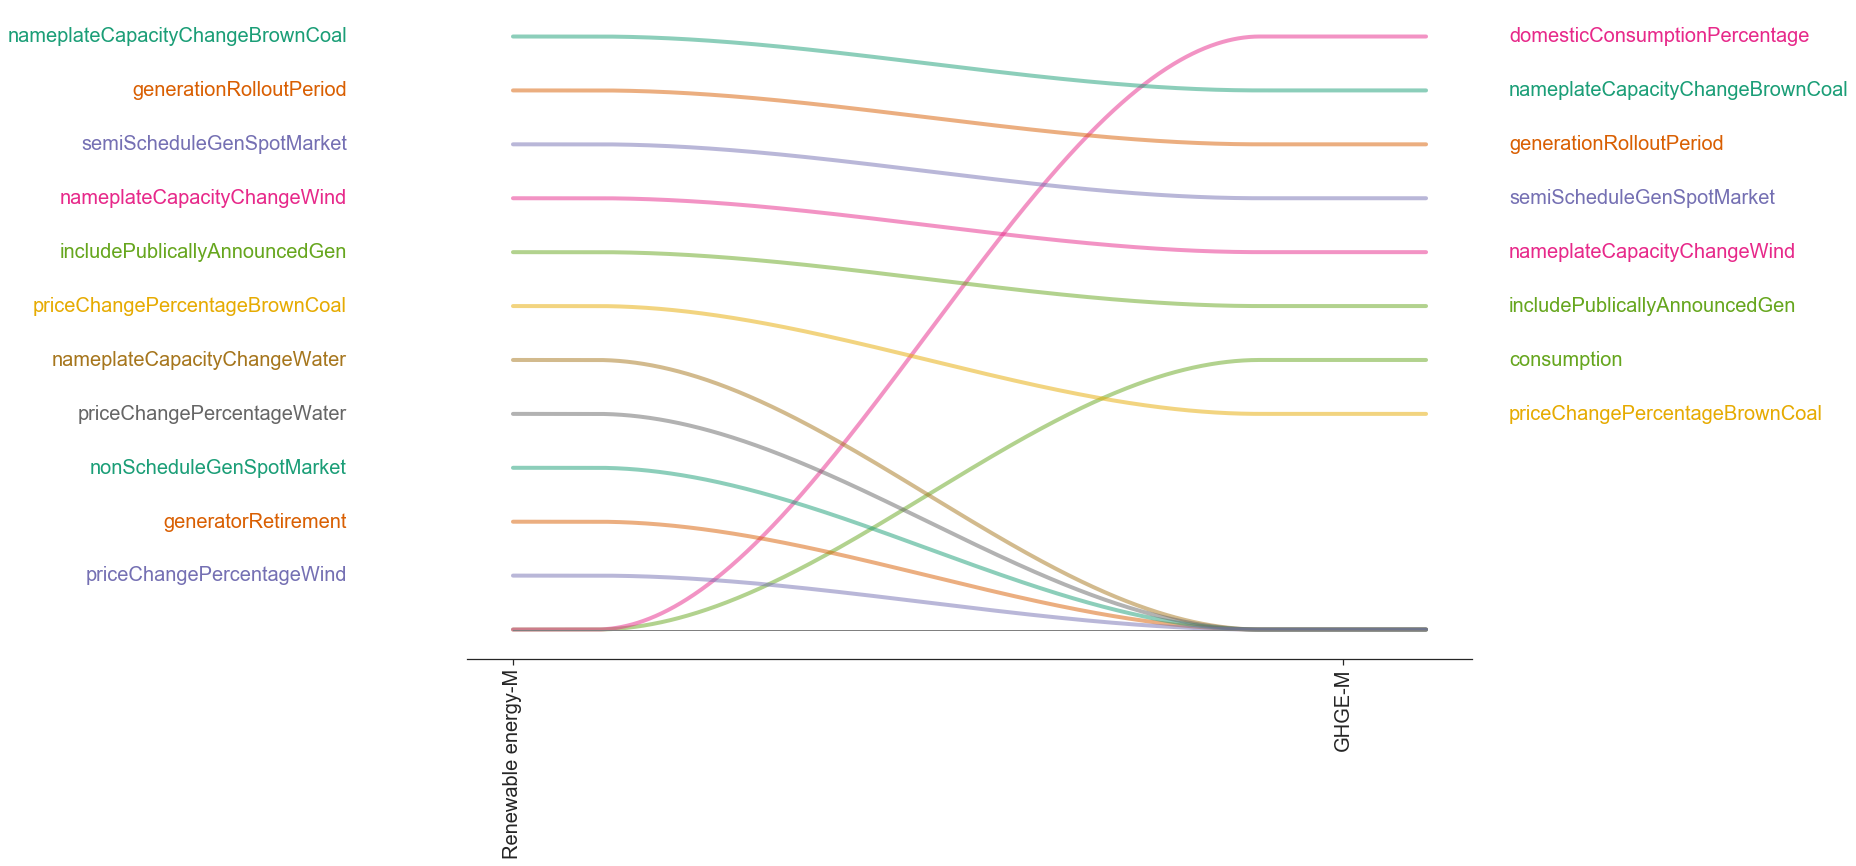

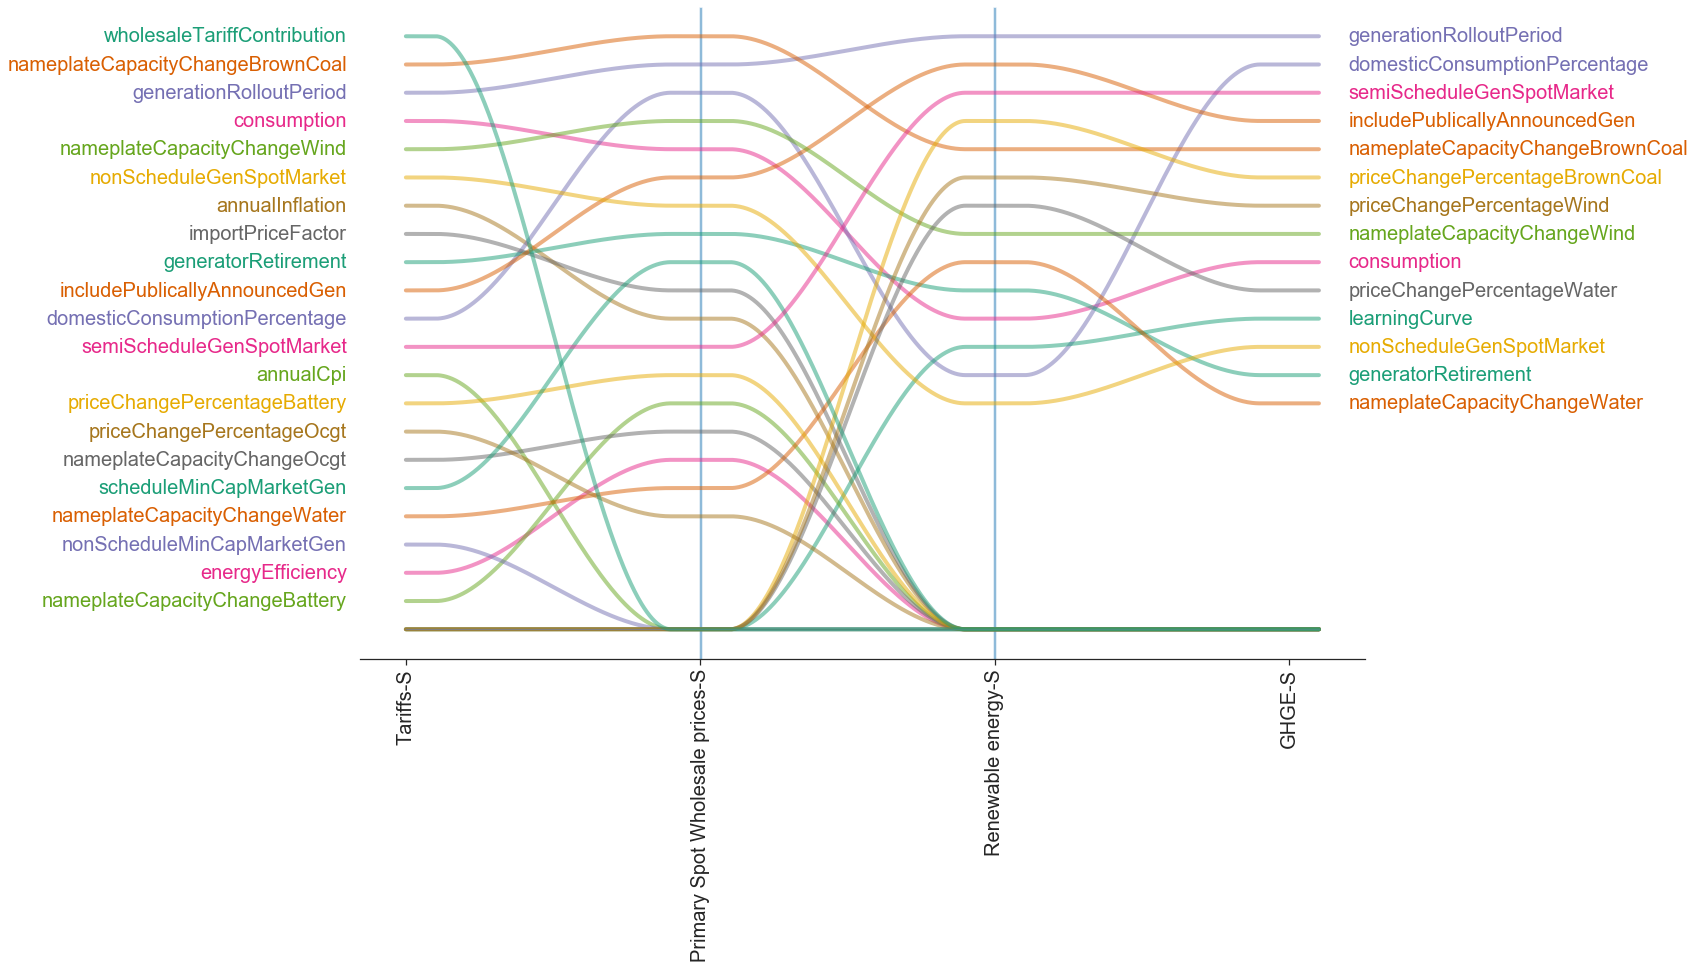

In [11]:
### MU
plt.figure(figsize=(18,12))
bumpsplot(eet_mu, color_dict=input_colors_mu, linewidth_dict=lw_mu, labels=top_inputs_mu)
plt.gca().get_yaxis().set_visible(False)

plt.xticks(np.arange(eet_mu.shape[1]), ["{}".format(c) for c in eet_mu.columns], rotation=90, fontsize=20)

for i,d in enumerate(eet_mu.columns):
    if i != 0 and i != len(eet_mu.columns)-1:
        plt.axvspan(i-0.005, i+0.005, zorder=0, alpha=0.5)

sns.despine(left=True)

### MU Prices 
plt.figure(figsize=(18,12))
bumpsplot(eet_mu_prices, color_dict=input_colors_mu_prices, linewidth_dict=lw_mu_prices, labels=top_inputs_mu_prices)
plt.gca().get_yaxis().set_visible(False)

plt.xticks(np.arange(eet_mu_prices.shape[1]), ["{}".format(c) for c in eet_mu_prices.columns], rotation=90, fontsize=20)

for i,d in enumerate(eet_mu_prices.columns):
    if i != 0 and i != len(eet_mu_prices.columns)-1:
        plt.axvspan(i-0.005, i+0.005, zorder=0, alpha=0.5)

sns.despine(left=True)


### MU  Other
plt.figure(figsize=(18,12))
bumpsplot(eet_mu_other, color_dict=input_colors_mu_other, linewidth_dict=lw_mu_other, labels=top_inputs_mu_other)
plt.gca().get_yaxis().set_visible(False)

plt.xticks(np.arange(eet_mu_other.shape[1]), ["{}".format(c) for c in eet_mu_other.columns], rotation=90, fontsize=20)

for i,d in enumerate(eet_mu_other.columns):
    if i != 0 and i != len(eet_mu_other.columns)-1:
        plt.axvspan(i-0.005, i+0.005, zorder=0, alpha=0.5)

sns.despine(left=True)

### SIGMA
plt.figure(figsize=(18,12))
bumpsplot(eet_sigma, color_dict=input_colors_sigma, linewidth_dict=lw_sigma, labels=top_inputs_sigma)
plt.gca().get_yaxis().set_visible(False)

plt.xticks(np.arange(eet_sigma.shape[1]), ["{}".format(c) for c in eet_sigma.columns], rotation=90, fontsize=20)

for i,d in enumerate(eet_sigma.columns):
    if i != 0 and i != len(eet_sigma.columns)-1:
        plt.axvspan(i-0.005, i+0.005, zorder=0, alpha=0.5)

sns.despine(left=True)

## Hypothetical past EET

In [6]:
eet = pd.read_csv(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/eet_hypoPast.csv',index_col="inputs")
eet_mu = eet[['Primary Spot Wholesale prices-M','Tariffs-M','Renewable energy-M','GHGE-M', ]]
eet_sigma = eet[['Tariffs-S','Primary Spot Wholesale prices-S', 'Renewable energy-S', 'GHGE-S']]

In [7]:
input_colors_mu = defaultdict(lambda: "grey")
lw_mu = defaultdict(lambda: 1)

input_colors_sigma = defaultdict(lambda: "grey")
lw_sigma = defaultdict(lambda: 1)

top_inputs_mu = eet_mu.iloc[:, 0].dropna().sort_values(ascending=False).index
top_inputs_mu = top_inputs_mu.append(eet_mu.iloc[:, -1].dropna().sort_values().index).drop_duplicates()

top_inputs_sigma = eet_sigma.iloc[:, 0].dropna().sort_values().index
top_inputs_sigma = top_inputs_sigma.append(eet_sigma.iloc[:, -1].dropna().sort_values().index).drop_duplicates()


for i,c in enumerate(top_inputs_mu):
    input_colors_mu[c] = sns.color_palette("husl", n_colors=len(top_inputs_mu))[i]
    lw_mu[c] = 4
    
for i,c in enumerate(top_inputs_sigma):
    input_colors_sigma[c] = sns.color_palette("husl", n_colors=len(top_inputs_sigma))[i]
    lw_sigma[c] = 4

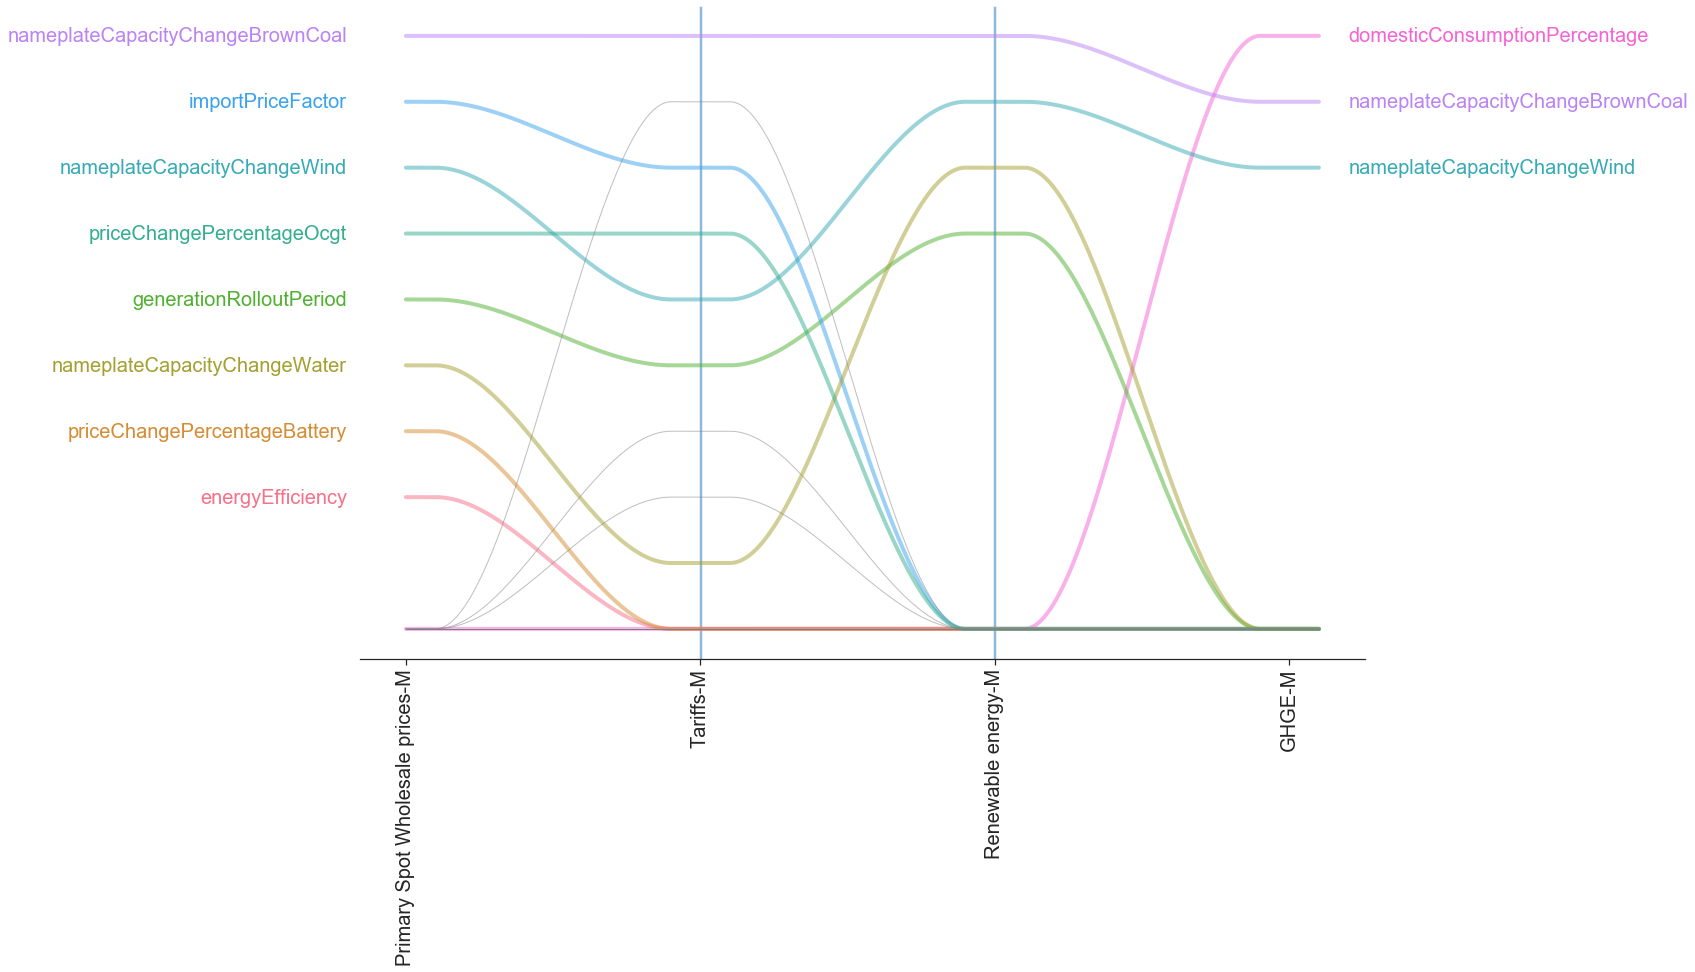

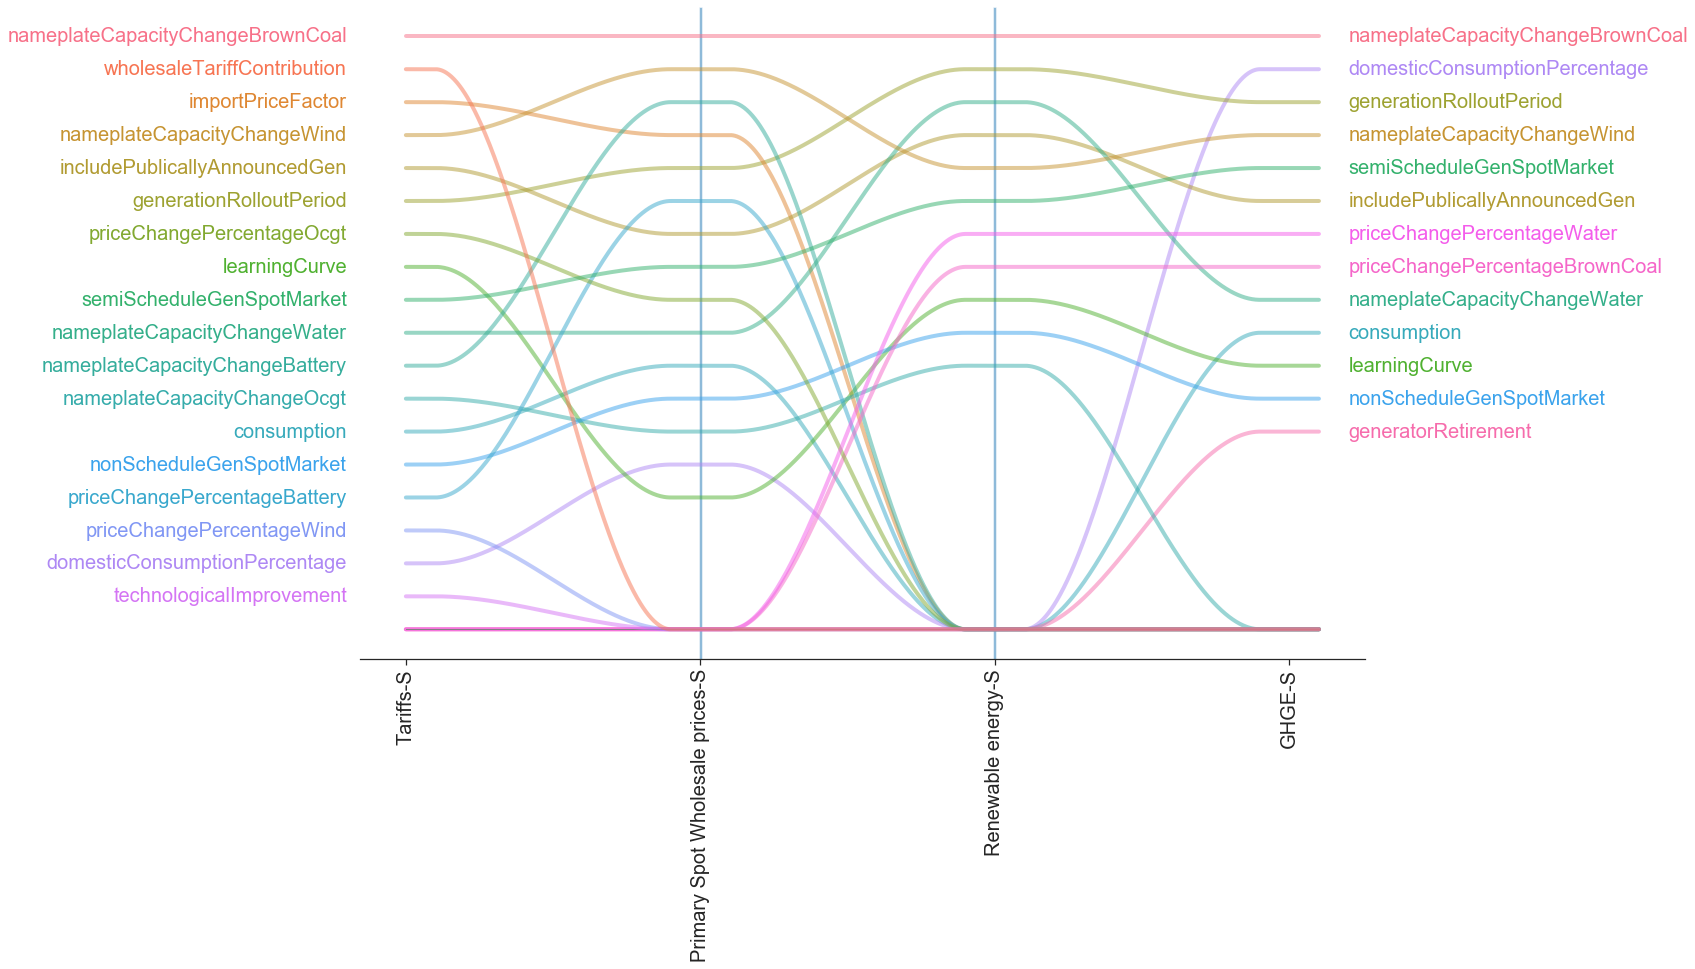

In [8]:
### MU
plt.figure(figsize=(18,12))
bumpsplot(eet_mu, color_dict=input_colors_mu, linewidth_dict=lw_mu, labels=top_inputs_mu)
plt.gca().get_yaxis().set_visible(False)

plt.xticks(np.arange(eet_mu.shape[1]), ["{}".format(c) for c in eet_mu.columns], rotation=90, fontsize=20)

for i,d in enumerate(eet_mu.columns):
    if i != 0 and i != len(eet_mu.columns)-1:
        plt.axvspan(i-0.005, i+0.005, zorder=0, alpha=0.5)

sns.despine(left=True)

### SIGMA
plt.figure(figsize=(18,12))
bumpsplot(eet_sigma, color_dict=input_colors_sigma, linewidth_dict=lw_sigma, labels=top_inputs_sigma)
plt.gca().get_yaxis().set_visible(False)

plt.xticks(np.arange(eet_sigma.shape[1]), ["{}".format(c) for c in eet_sigma.columns], rotation=90, fontsize=20)

for i,d in enumerate(eet_sigma.columns):
    if i != 0 and i != len(eet_sigma.columns)-1:
        plt.axvspan(i-0.005, i+0.005, zorder=0, alpha=0.5)

sns.despine(left=True)